# Git Repository Analysis

This notebook analyzes commit history from `commits.csv` and `author_summary.csv`, providing insights such as most active authors, commit trends, and most used words in commit messages.

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# Load the commit and author summary data
commits = pd.read_csv('commits.csv', parse_dates=['date'])
authors = pd.read_csv('author_summary.csv')

# Display first few rows
commits.head()

,hexsha,author_name,author_email,date,message,files_changed,insertions,deletions,total_changes,is_merge
0,4b638de3ae2a201e246255b15bc2a1fc93787808,ChrisHorler,csh.sammt@gmail.com,2025-05-16 13:05:11+02:00,Initial commit,1,1,0,1,False
1,0e8fc789c0ad05021d1c5495f2a4c8e3a4deeafc,OldMartijntje_ubuntu,oldmartijntje@gmail.com,2025-05-27 12:17:41+02:00,template data,2,25,0,25,False
2,455b509487e9bcea5dd8494d151090b6de6f6313,OldMartijntje_ubuntu,oldmartijntje@gmail.com,2025-05-27 12:18:00+02:00,Merge branch 'feature/json_templating' into de...,2,25,0,25,True
3,2f837d51a2a748908d2c26fc8bc8f73a72064f93,OldMartijntje_ubuntu,oldmartijntje@gmail.com,2025-05-27 12:21:47+02:00,Add comment to clarify purpose of empty list i...,1,1,1,2,False
4,5d72621c38fb9b99601a6da468034e77c12b3391,OldMartijntje_ubuntu,oldmartijntje@gmail.com,2025-05-27 12:22:01+02:00,Merge branch 'feature/json_templating' into de...,1,1,1,2,True


## Commit Trends Over Time
Plot the number of commits per month to visualize the activity trend.

/tmp/ipykernel_650731/1402550148.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  commits['month'] = commits['date'].dt.to_period('M')


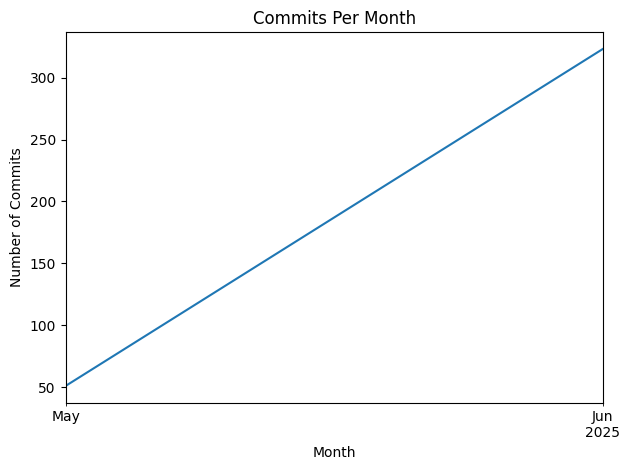

In [4]:
# Prepare data
commits['month'] = commits['date'].dt.to_period('M')
monthly_counts = commits.groupby('month').size()

# Plot
plt.figure()
monthly_counts.plot(kind='line')
plt.title('Commits Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.tight_layout()
plt.show()

## Top Contributors
Show the top 5 authors by number of commits.

In [5]:
# Top 5 authors
top_authors = authors.sort_values('total_commits', ascending=False).head(5)
top_authors

,author_name,total_commits,total_merges,insertions,deletions,total_changes,most_commits,most_merges,most_changes
8,oldmartijntje_TH,86,11,4137,1700,5837,True,False,False
2,ChrisHorler,74,0,3387,1056,4443,False,False,False
3,Christian Scott Horler,57,57,10342,5019,15361,False,True,False
5,Martijn,55,53,62687,9222,71909,False,False,True
4,JurPurr,35,1,5403,1716,7119,False,False,False


## Most Used Words in Commit Messages
Compute the most common words used in commit messages (excluding common stopwords).

In [6]:
# Define simple stopwords
stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'for', 'a', 'an', 'is', 'on', 'with', 'update', 'fix', 
    'add', 'remove', 'refactor', 'cleanup', 'release'
])

# Tokenize messages
words = Counter()
for msg in commits['message']:
    for word in msg.lower().split():
        word = ''.join(filter(str.isalpha, word))
        if word and word not in stopwords:
            words[word] += 1

# Most common words
common_words = words.most_common(20)
pd.DataFrame(common_words, columns=['word', 'count'])

,word,count
0,merge,131
1,develop,94
2,branch,75
3,from,60
4,request,55
5,pull,54
6,into,48
7,added,40
8,updated,39
9,chrishorlerdevelop,34
